# CS485 - Data Science and Applications

  **Homework 1**

  Feel free to ignore the already implemented code and use your own.

## **Part A**

We will empirically verify that solving a linear system using np.linalg.solve() is more efficient than computing the inverse explicitly and multiplying it by the vector.
### Experiment Design

   1. Generate a random $n \times n$(for $n \in \{10, 50, 100, 200, 500, 1000\})$, a random matrix $A$ and a random vector $b$. Use your ID as a random seed.
   2. Solve for $x$ in $Ax = b$ using:
        - Direct inversion: $A^{-1} b$
        - np.linalg.solve(A, b)
   3. Repeat the experiment 10 times for each matrix size and compute the mean run time.
   4. Plot the results.

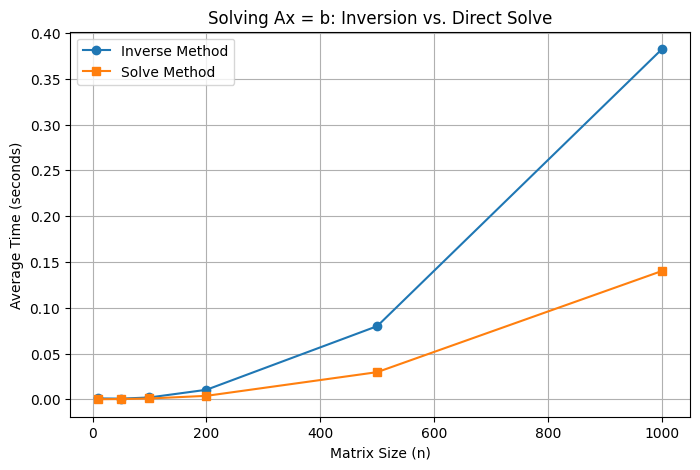

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define range of matrix sizes
n_values = [10, 50, 100, 200, 500, 1000]
num_trials = 10

# Store mean run times
times_inv = []
times_solve = []

np.random.seed(4584)

for n in n_values:
    inv_times = []
    solve_times = []

    for _ in range(num_trials):
        A = np.random.rand(n, n)
        b = np.random.rand(n)

        start = time.time()
        A_inv = np.linalg.inv(A)
        x_inv = np.dot(A_inv, b)
        inv_times.append(time.time() - start)

        start = time.time()
        x_solve = np.linalg.solve(A, b)
        solve_times.append(time.time() - start)

    times_inv.append(np.mean(inv_times))
    times_solve.append(np.mean(solve_times))

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_values, times_inv, marker="o", linestyle="-", label="Inverse Method")
plt.plot(n_values, times_solve, marker="s", linestyle="-", label="Solve Method")
plt.xlabel("Matrix Size (n)")
plt.ylabel("Average Time (seconds)")
plt.title("Solving Ax = b: Inversion vs. Direct Solve")
plt.legend()
plt.grid()
plt.show()


## Part B


 This exercise is crucial because it helps us understand the mechanics behind **data augmentation**—a key technique in enhancing machine learning models' robustness by generating varied training examples from existing data. Data augmentation, such as rotations, scaling, and flipping, is instrumental in teaching models to recognize patterns and objects under diverse conditions, thus improving their ability to generalize. This foundational understanding is essential for tackling more complex data science challenges, where such transformations are often automated and embedded within more advanced analytical tools and models.

In [2]:
!wget -O image.jpg 'https://everpresent.com/wp-content/uploads/2024/03/albert-einstein-sticks-out-his-tongue-when-asked-by-news-photo-1681316749-scaled.jpg'

--2025-03-01 16:06:07--  https://everpresent.com/wp-content/uploads/2024/03/albert-einstein-sticks-out-his-tongue-when-asked-by-news-photo-1681316749-scaled.jpg
Resolving everpresent.com (everpresent.com)... 141.193.213.20
Connecting to everpresent.com (everpresent.com)|141.193.213.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2240191 (2.1M) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   2.14M  --.-KB/s    in 0.05s   

2025-03-01 16:06:07 (41.4 MB/s) - ‘image.jpg’ saved [2240191/2240191]



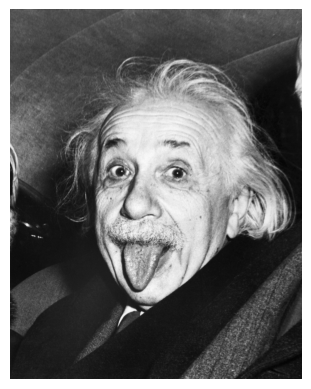

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image file directly using matplotlib
img = plt.imread('image.jpg')

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [4]:
img

array([[ 87,  90,  91, ..., 100,  94,  98],
       [ 88,  90,  89, ...,  99,  95, 100],
       [ 94,  93,  89, ..., 101,  98, 102],
       ...,
       [ 33,  33,  32, ...,  30,  30,  30],
       [ 33,  33,  33, ...,  31,  33,  33],
       [ 33,  33,  33, ...,  32,  33,  34]], dtype=uint8)

### Question A

Flipping an image, such as reflecting it across a vertical or horizontal axis, is not strictly a linear transformation; it is an affine transformation. Here’s why:

### Linear vs. Affine Transformations
1. **Linear Transformations** strictly adhere to two main properties:
   - **Additivity**: $T(u + v) = T(u) + T(v)$
   - **Homogeneity**: $T(\alpha u) = \alpha T(u)$

   These transformations can be represented solely by a matrix multiplication and include rotations, scalings, and shearings. Linear transformations always map the origin to itself.

2. **Affine Transformations** include all linear transformations and also allow translations (shifts). They can be represented by a matrix multiplication followed by a vector addition:
   $$
   \text{For a vector } x, \quad T(x) = Ax + b
   $$
   Here, $A$ is a matrix that performs the linear part of the transformation, and $b$ is a vector that handles the translation.

### Flipping Images
When you flip an image, you effectively reflect its pixels across an axis. This operation can be visualized as follows:

- **Vertical Flip**: Mirrors the image over the horizontal axis. This can be thought of as a reflection combined with a translation if the image is considered to extend from $0$ to $n$ pixels vertically.
- **Horizontal Flip**: Mirrors the image over the vertical axis. Similarly, this is a reflection possibly combined with a translation in the horizontal direction.

The matrix for a flip (reflection) might look like this for a vertical flip in 2D space, where $y$ values are inverted:
$$
R_{vertical} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$
This matrix inverts the $y$-coordinate while keeping the $x$-coordinate the same, which reflects points over the $x$-axis. To correctly place the reflected points relative to the original image coordinates, a translation vector might be necessary, depending on your coordinate system and image handling conventions (e.g., flipping the image to the bottom of the canvas if your origin is at the top).


In [5]:
def vertical_flip(img):
    flip_image = img[:, ::-1, ...]
    return flip_image


In [6]:
def horizontal_flip(img):
    flip_image = img[::-1, :, ...]
    return flip_image


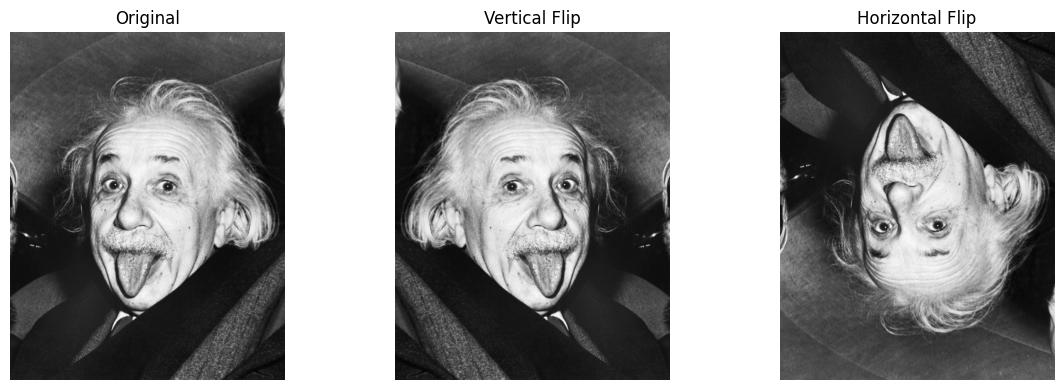

In [7]:

v_flipped_img = vertical_flip(img)
h_flipped_img = horizontal_flip(img)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(v_flipped_img, cmap='gray')
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(h_flipped_img, cmap='gray')
plt.title("Horizontal Flip")
plt.axis("off")

plt.tight_layout()
plt.show()

### Question B

Using a rotation matrix and Linear Transformations rotate and plot the image of Albert Einstein by 45 degrees. (Takes around 45-60 seconds per run)

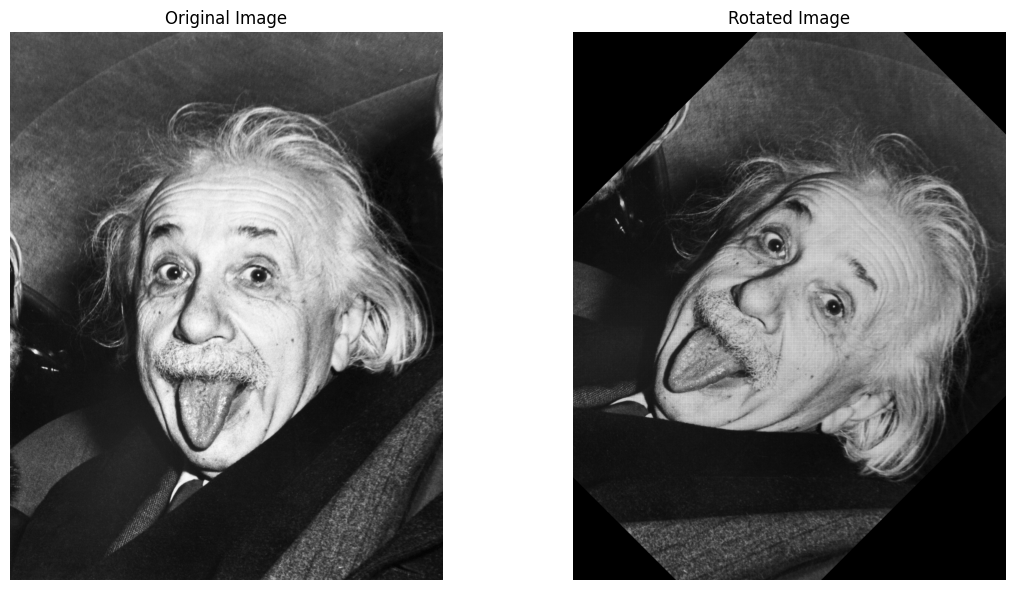

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(img, angle):
    angle_rad = np.deg2rad(angle)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)

    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

    height, width = img.shape[0], img.shape[1]

    rotated_image = np.zeros_like(img)

    center_x, center_y = width // 2, height // 2

    for x in range(width):
        for y in range(height):
            translated_x = x - center_x
            translated_y = y - center_y

            new_x = cos_theta * translated_x - sin_theta * translated_y
            new_y = sin_theta * translated_x + cos_theta * translated_y

            xn = int(new_x + center_x)
            yn = int(new_y + center_y)

            if 0 <= xn < width and 0 <= yn < height:
                rotated_image[yn, xn] = img[y, x]

    return rotated_image

img = plt.imread('image.jpg')


rotated_img = rotate_image(img, 45)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(rotated_img,cmap='gray')
ax[1].set_title('Rotated Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()